
# 小地域の収入推定

```Data```フォルダには、小地域の収入データ(```income_district.csv```)と国勢調査の小地域集計データが格納されています。

国勢調査の小地域集計データ（人口構成、労働力構成、住宅形態など）から、その地域の収入を推定することが考えられます。推定のための機械学習・深層学習モデルを構築しなさい。


- データを観察・理解する上で、データの構造を説明しながら、適切なデータ整形を行いなさい
- データ構造や分析結果に対して、少なくとも二つの図で可視化を行いなさい
- モデルの精度を評価し、できるだけ精度が高いモデルを得るよう、適切な特徴量エンジニアリングやモデル選定の考えもまとめなさい


【考察】

データを観察・理解する上で、データの構造を説明しながら、適切なデータ整形を行いなさい

-場所を指定し、その場所においてのデータが表されている、表されるデータは例えば、男性と女性の人口と総人口など

データ構造や分析結果に対して、少なくとも二つの図で可視化を行いなさい


-1.正解の値と予測の値との関係を表す図　2.どの特徴量が精度にどのくらい影響しているか

モデルの精度を評価し、できるだけ精度が高いモデルを得るよう、適切な特徴量エンジニアリングやモデル選定の考えもまとめなさい


-できるだけ精度の高いモデルを得るように、より多くの特徴量を使用した
-なお、何丁目までのデータを入れるとうまくいかなかったため、市区まででデータを分析した
-結婚に関連しているデータだけを使ったら精度が良くなると思ったが、精度が少し悪くなってしまった。このことから、他の特徴量も重要であることが分かった
-ランダムフォレストを今回使用した理由としては、線形回帰にはない柔軟性と高い予測精度を持っているためであり、大量の特徴量を分析することができるためである

In [13]:
import pandas as pd
import geopandas as gpd
age_df = pd.read_csv('Data/h27_age_df.csv')
family_df = pd.read_csv('Data/h27_family_df.csv')
gender_df = pd.read_csv('Data/h27_gender_df2.csv')
house_df = pd.read_csv('Data/h27_house_df.csv')
house_info_df = pd.read_csv('Data/h27_house_info_df.csv')
indusry_df = pd.read_csv('Data/h27_indusry_df.csv')
job_df = pd.read_csv('Data/h27_job_df.csv')
labor_df = pd.read_csv('Data/h27_labor_df.csv')
marriage_df = pd.read_csv('Data/h27_marriage_df.csv')
work_status_df = pd.read_csv('Data/h27_work_status_df.csv')
income_district = pd.read_csv('Data/income_district.csv')
gdf = gpd.read_file('13-tokyo-all.geojson')

In [14]:
print(gender_df.head())
#場所を指定し、その場所においてのデータが表されている
#表されるデータは例えば、男性と女性の人口と総人口など

   district_id  district2_id  level_identifier state_name city_name  \
0        18201           NaN                 1        福井県       福井市   
1        18201          10.0                 2        福井県       福井市   
2        18201          30.0                 2        福井県       福井市   
3        18201          40.0                 2        福井県       福井市   
4        18201        4001.0                 3        福井県       福井市   

  district_name district2_name population male_population female_population  \
0           NaN            NaN     265904          128892            137012   
1           明里町            NaN        386             191               195   
2           足谷町            NaN          X               X                 X   
3            足羽            NaN       2881            1382              1499   
4            足羽            １丁目        771             375               396   

  family_count  
0        99872  
1          193  
2            X  
3         1178  
4          31

In [15]:
#データの結合

csv_data_name = ['age','family','gender','house','house_info','indusry','job','labor','marriage','work_status','income_district']

merged_df={}

merged_df = pd.merge(
    age_df,
    family_df,
    on=["district_id", "district2_id", "state_name", "city_name", "district_name", "district2_name"],
    how="inner",
    suffixes=('', '_family')
)

merged_df = pd.merge(
    merged_df,
    gender_df,
    on=["district_id", "district2_id", "state_name", "city_name", "district_name", "district2_name"],
    how="inner",
    suffixes=('', '_gender')
)


merged_df = pd.merge(
    merged_df,
    house_df,
    on=["district_id", "district2_id", "state_name", "city_name", "district_name", "district2_name"],
    how="inner",
    suffixes=('', '_house')
)

merged_df = pd.merge(
    merged_df,
    house_info_df,
    on=["district_id", "district2_id", "state_name", "city_name", "district_name", "district2_name"],
    how="inner",
    suffixes=('', '_house_info')
)


merged_df = pd.merge(
    merged_df,
    indusry_df,
    on=["district_id", "district2_id", "state_name", "city_name", "district_name", "district2_name"],
    how="inner",
    suffixes=('', '_indusry')
)

merged_df = pd.merge(
    merged_df,
    job_df,
    on=["district_id", "district2_id", "state_name", "city_name", "district_name", "district2_name"],
    how="inner",
    suffixes=('', '_job')
)

merged_df = pd.merge(
    merged_df,
    labor_df,
    on=["district_id", "district2_id", "state_name", "city_name", "district_name", "district2_name"],
    how="inner",
    suffixes=('', '_labor')
)

merged_df = pd.merge(
    merged_df,
    marriage_df,
    on=["district_id", "district2_id", "state_name", "city_name", "district_name", "district2_name"],
    how="inner",
    suffixes=('', '_marriage')
)

merged_df = pd.merge(
    merged_df,
    work_status_df,
    on=["district_id", "district2_id", "state_name", "city_name", "district_name", "district2_name"],
    how="inner",
    suffixes=('', '_work_status')
)



In [16]:
merged_df = pd.merge(
    merged_df,
    income_district,
    left_on="district_id",
    right_on="area_code",
    how="left"
)

In [17]:
print(list(merged_df.columns))

['district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100', '0-4_male', '5-9_male', '10-14_male', '15-19_male', '20_24_male', '25-29_male', '30-34_male', '35-39_male', '40-44_male', '45-49_male', '50-54_male', '55-59_male', '60-64_male', '65-69_male', '70-74_male', '75-79_male', '80-84_male', '85-89_male', '90-94_male', '95-99_male', '100_male', '0-4_female', '5-9_female', '10-14_female', '15-19_female', '20_24_female', '25-29_female', '30-34_female', '35-39_female', '40-44_female', '45-49_female', '50-54_female', '55-59_female', '60-64_female', '65-69_female', '70-74_female', '75-79_female', '80-84_female', '85-89_female', '90-94_female', '95-99_female', '100_female', 'level_identifier_family', 'family_count', 'family_member_count', 'general_family_count', 'member_1

In [18]:
df = merged_df.copy()
df = df[df['level_identifier'] == 1]  # 市区レベルだけに絞る
features = [
    'married', 'unmarried', 'divorced',
    'labor_male', 'labor_female',
    'employer_male', 'employer_female',
    'own_house_family', 'public_rent_family',
    'family_member_count', 'population',
    '11floor_family', 'share_house_family',
    'self_employed_male', 'self_employed_female',
    'no_labor_male', 'no_labor_female',
    'own_house_individual', '11floor_individual',
    'O_education_male', 'O_education_female',
    'P_health_care_male', 'P_health_care_female',
]

df[features + ['income_mean']] = df[features + ['income_mean']].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=features + ['income_mean'])

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X = df[features]
y = df['income_mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("データとのずれMAE:", mean_absolute_error(y_test, y_pred))
print("精度R²:", r2_score(y_test, y_pred))


データとのずれMAE: 29.724423262303834
精度R²: 0.5848321317144374


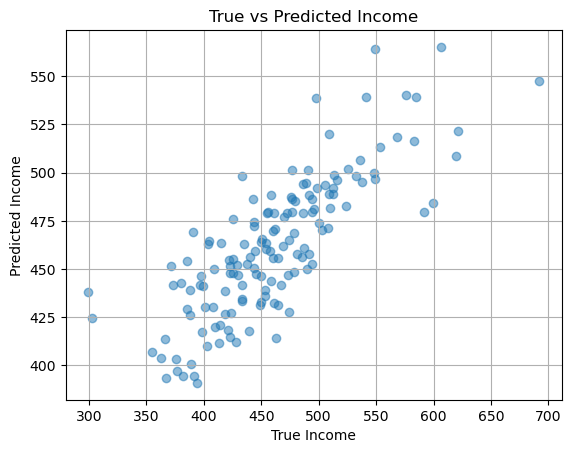

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Income")
plt.ylabel("Predicted Income")
plt.title("True vs Predicted Income")
plt.grid(True)
plt.show()


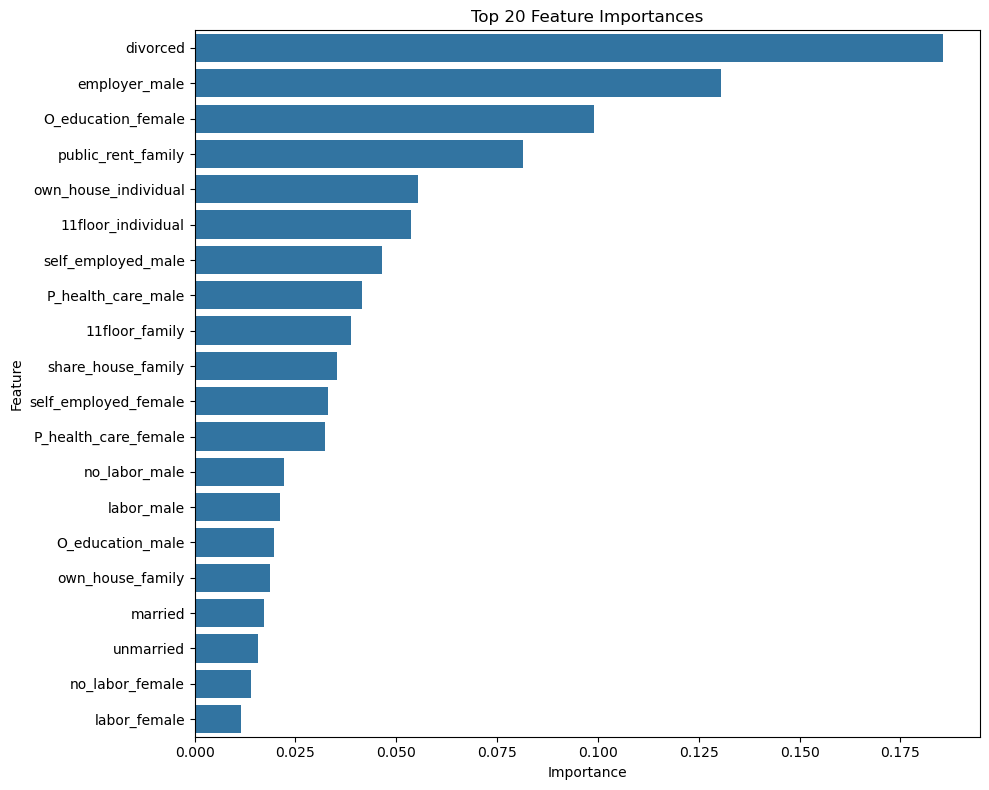

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 特徴量の重要性が高いものを取る
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df.head(20), x='importance', y='feature')
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [21]:
df = merged_df.copy()
df = df[df['level_identifier'] == 1]  # 市区レベルだけに絞る
features = [
    'married', 'unmarried', 'divorced',
]

df[features + ['income_mean']] = df[features + ['income_mean']].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=features + ['income_mean'])

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X = df[features]
y = df['income_mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("データとのずれMAE:", mean_absolute_error(y_test, y_pred))
print("精度R²:", r2_score(y_test, y_pred))


データとのずれMAE: 32.71207718061024
精度R²: 0.5460037200187706
